# 1.	Introducere

## 1.1.	Scop
Scopul acestui proiect este de a dezvolta și implementa un sistem de recunoaștere a formelor cu ajutorul Convolutional Neural Networks (CNN) pentru identificarea tipurilor de plante (patrunjel, mărar și busuioc) în imagini. 
Acest sistem va fi o aplicație utilă în domeniul agricol și în identificarea plantelor. Scopul final este să dezvoltăm un model de învățare automată care poate clasifica cu precizie tipurile de plante din imagini, oferind astfel o soluție eficientă și automatizată.

## 1.2.	Context
În contextul evoluției tehnologiei și al creșterii interesului pentru agricultura de precizie, recunoașterea plantelor în imagini devine o sarcină din ce în ce mai importantă. 
Acest proiect vine în întâmpinarea acestei necesități și explorează abordarea folosind rețele neurale convoluționale (CNN). Rețelele CNN au demonstrat eficacitate într-o serie de aplicații de recunoaștere a obiectelor și au avansat semnificativ în domeniul învățării automate.
## 1.3.	Solutie

Soluția propusă constă în dezvoltarea și antrenarea unei rețele neurale convoluționale în limbajul de programare Python, folosind biblioteci precum TensorFlow. 
Această rețea va fi antrenată pe un set de date pe care l-am creat, care conține imagini cu trei tipuri de plante: patrunjel, mărar și busuioc. Procesul va implica extragerea unor caracteristici semnificative din imaginile de antrenament și ajustarea ponderilor rețelei pentru a realiza o clasificare precisă.

## 1.4.	Dataset
Setul de date creat pentru acest proiect conține aproximativ 100 de imagini pentru fiecare din cele trei tipuri de plante, adică patrunjel, mărar și busuioc. Dimensiunea totală a setului de date este de aproximativ 100MB. 
Imaginile au fost adunate și curățate pentru a asigura calitatea datelor. De asemenea, fiecare imagine este etichetată corect cu tipul de plantă pe care îl conține, ceea ce va servi drept anotare pentru antrenarea rețelei CNN.


In [7]:
%pip install tensorflow opencv-python matplotlib

  Using cached opencv_python-4.8.1.78-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_python-4.8.1.78-cp37-abi3-win_amd64.whl (38.1 MB)
Note: you may need to restart the kernel to use updated packages.


In [8]:

import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
import cv2
import imghdr


C:\Users\Tudor\AppData\Local\Temp\ipykernel_18896\3313151557.py:6: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [9]:
def clear_images(path):
    files = os.listdir(path)
    for file in files:
        if not (file.endswith('.jpg') or file.endswith('.jpeg') or file.endswith('.png')):
            files.remove(file)

In [10]:
# remove duplicates
import hashlib

def remove_duplicates(path):
    hashes = set()
    directory = path

    for filename in os.listdir(directory):
        path = os.path.join(directory, filename)
        digest = hashlib.sha1(open(path,'rb').read()).digest()
        if digest not in hashes:
            hashes.add(digest)
        else:
            os.remove(path)
# this works only for images with the same size

In [13]:
def display_images(path):
    files = os.listdir(path)
    show_images = files[:5]
    for file in show_images:
        img = mpimg.imread(os.path.join(path, file))
        plt.figure()
        plt.imshow(img)

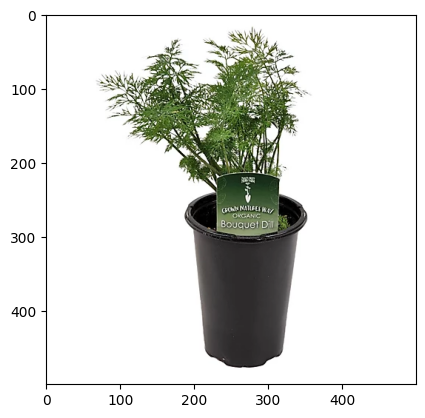

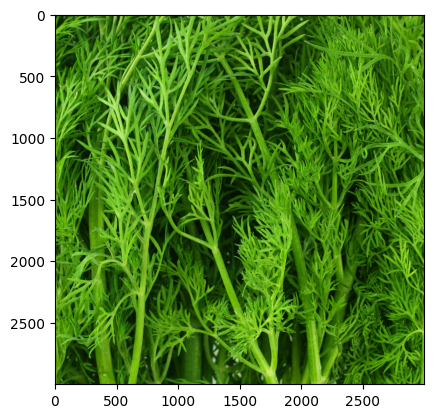

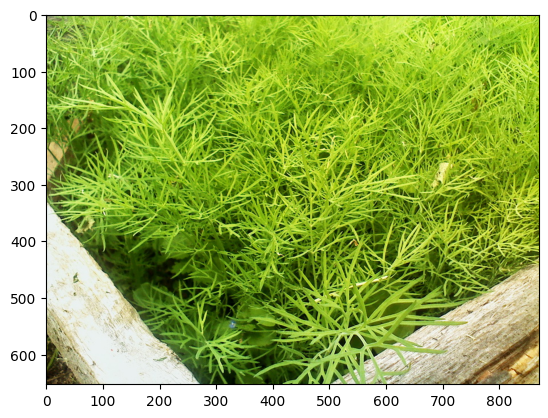

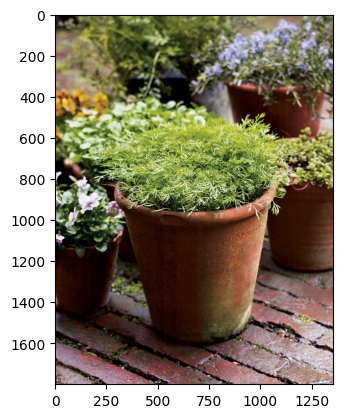

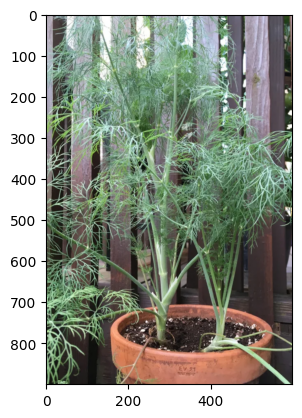

In [14]:
path = 'D:\\facultate\\An4sem1\\SRF\\proiect\\images\\marar'
clear_images(path)
display_images(path)

2. remove unwanted extensions

In [9]:
# yt
data_dir = 'images'
image_exts = ['jpg', 'jpeg', 'png', 'bmp']

In [10]:
os.listdir(data_dir)

['busuioc', 'marar', 'patrunjel']

In [11]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Image not in ext list images\busuioc\2MDQxNTkyMjFCQjFGRTBDMDlERjBCNkE5MzVENTBEODI0RURCQzM4LmpwZw.jpg
Image not in ext list images\busuioc\busuioc-13-gr.jpg
Image not in ext list images\busuioc\busuioc-thai-siam-queen-150-seminte.jpg
Image not in ext list images\busuioc\cultivarea-busuiocului-in-ghiveci.webp
Image not in ext list images\busuioc\index.jpeg
Image not in ext list images\busuioc\plante.jpg
Image not in ext list images\busuioc\TufC483_de_busuioc_pdplarge-mrd--656300_AFS_00_00_00_12623354.jpg
Image not in ext list images\busuioc\TufC483_de_busuioc_pdplarge-mrd--656300_PDT_00_00_00_12623355.jpg
Image not in ext list images\busuioc\TufC483_de_busuioc_pdplarge-mrd--656301_AFS_00_00_00_12623356.jpg
Image not in ext list images\marar\006189519.jpg
Image not in ext list images\marar\dill102.jpg
Image not in ext list images\marar\dill437.jpg
Image not in ext list images\marar\dill438.jpg
Image not in ext list images\marar\dill456.jpg
Image not in ext list images\marar\dill457.jpg
Im

3. Load Data

In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [30]:
data = tf.keras.preprocessing.image_dataset_from_directory('images') # building data pipeline

Found 384 files belonging to 3 classes.


In [31]:
data_iterator = data.as_numpy_iterator() # accessing data, allowing us to loop through it

In [32]:
batch = next(data_iterator) # getting the first batch

In [33]:
batch[0].shape # getting the shape of the first batch

(32, 256, 256, 3)

In [34]:
# 0 - busuioc
# 1 - marar
# 2 - patrunjel

batch[1]

array([1, 1, 2, 0, 0, 1, 1, 1, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 2, 1, 2, 0, 2, 1])

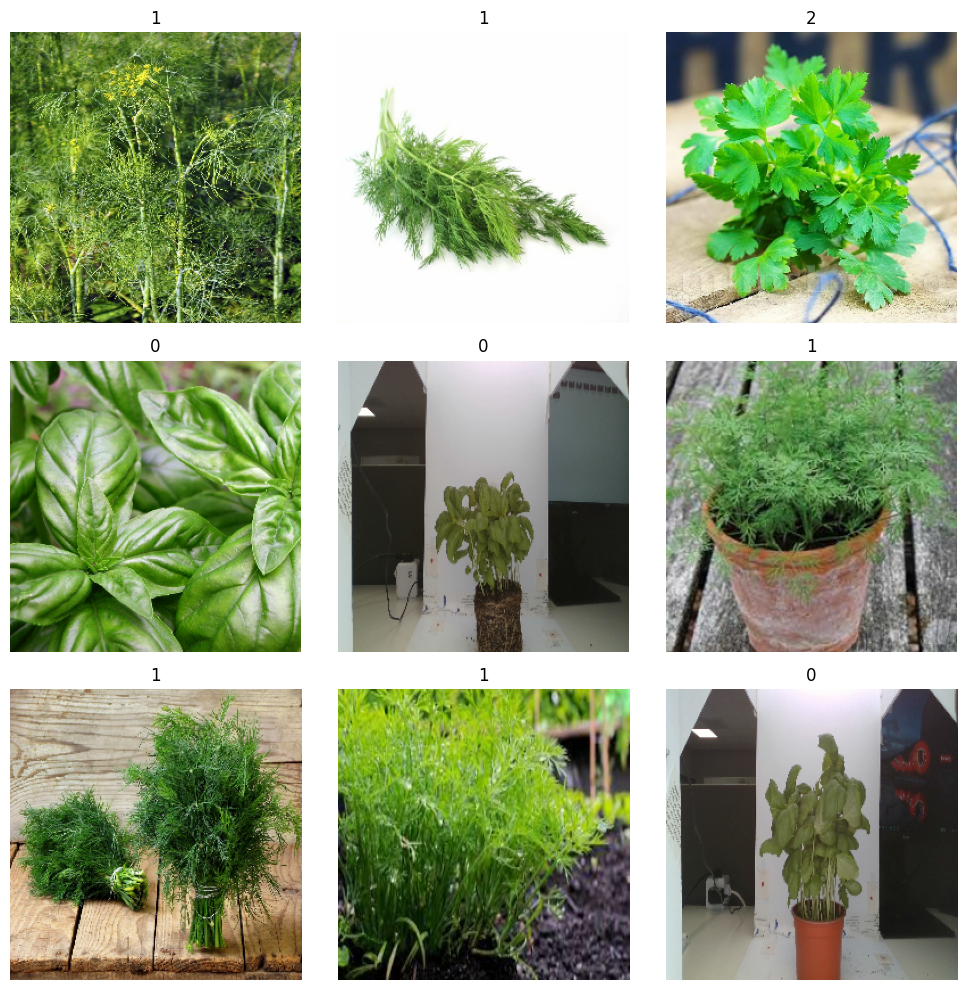

In [35]:
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
axes = axes.flatten()
for img, label, ax in zip(batch[0], batch[1], axes):
    ax.imshow(img.astype('uint8'))
    ax.axis('off')
    ax.set_title(label)
plt.tight_layout()
plt.show()
